# Part I - Loan Data from Prosper
## by Jasmine W.

## Introduction

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.

The dataset holds data about 113,937 loans from a company called _Prosper_. This includes the following loan information: **"Listing Key"**, **"Listing Number"**, **"Listing Creation Date"**, **"Credit Grade"**, **"Term"**, **"Loan Status", "Closed Date"**, **"Borrower APR"**, **"Borrower Rate"**, **"Lender Yield"**, **"Estimated Effective Yield", "Estimated Loss"**, **"Estimated Return"**, **"Prosper Rating (numeric)"**, **"Prosper Rating (Alpha)", "Prosper Score"**, **"Listing Category (numeric)"**, **"Borrower State"**, **"Occupation"**, **"Employment Status", "Employment Status Duration"**, **"Is Borrower Homeowner"**, **"Currently In Group"**, **"Group Key", "Date Credit Pulled"**, **"Credit Score Range Lower"**, **"Credit Score Range Upper", "First Recorded Credit Line"**, **"Current Credit Lines"**, **"Open Credit Lines", "Total Credit Lines past 7 years"**, **"Open Revolving Accounts", "Open Revolving Monthly Payment"**, **"Inquiries Last 6 Months"**, **"Total Inquiries"**, **"Current Delinquencies", "Amount Delinquent"**, **"Delinquencies Last 7 Years"**, **"Public Records Last 10 Years", "Public Records Last 12 Months"**, **"Revolving Credit Balance"**, **"Bankcard Utilization", "Available Bankcard Credit"**, **"Total Trades"**, **"Trades Never Delinquent (percentage)", "Trades Opened Last 6 Months"**, **"Debt To Income Ratio"**, **"Income Range"**, **"Income Verifiable", "Stated Monthly Income"**, **"Loan Key"**, **"Total Prosper Loans"**, **"Total Prosper Payments Billed", "On Time Prosper Payments"**, **"Prosper Payments Less Than One Month Late", "Prosper Payments One Month Plus Late"**, **"Prosper Principal Borrowed"**, **"Prosper Principal Outstanding", "Score x Change At Time Of Listing"**, **"Loan Current Days Delinquent"**, **"Loan First Defaulted Cycle Number", "Loan Months Since Origination"**, **"Loan Number"**, **"Loan Original Amount"**, **"Loan Origination Date", "Loan Origination Quarter"**, **"Member Key"**, **"Monthly Loan Payment"**, **"LP_Customer Payments", "LP_Customer Principal Payments"**, **"LP_Interest and Fees"**, **"LP_Service Fees"**, **"LP_Collection Fees", "LP_Gross Principal Loss"**, **"LP_Net Principal Loss"**, **"LP_NonPrincipal Recovery Payments", "Percent Funded"**, **"Recommendations"**, **"Investment From Friends Count"**, **"Investment From Friends Amount"**, and **"Investors"**.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

> Note that the collective size of all your files in the current workspace **must not exceed 1 GB** in total. 


In [3]:
import zipfile

with zipfile.ZipFile("prosperLoanData.zip", "r") as zip_ref: # opens zip file in read-mode
    zip_ref.extractall("prosperLoanData/") # extracts all data in zip file

df_prosper_loan_data = pd.read_csv("prosperLoanData/prosperLoanData.csv") # loads CSV file of dataset
#df_prosper_loan_data.head() # displays first 5 rows of raw data from dataset
#df_prosper_loan_data.info() # displays columns' non-null count & dtype from dataset
#df_prosper_loan_data.describe() # displays columns' count, mean, standard deviation, minimum, 25% quartile, 50% quartile, 75% quartile, and maximum from dataset
#df_prosper_loan_data.count() # displays amount of each unique row in dataset
#df_prosper_loan_data.shape # displays dimensions in dataset
df_prosper_loan_data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
df_prosper_loan_data[["EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)","ProsperRating (Alpha)","ProsperScore","ListingCategory (numeric)","BorrowerState","Occupation","EmploymentStatus","EmploymentStatusDuration","IsBorrowerHomeowner","CurrentlyInGroup","GroupKey","DateCreditPulled","CreditScoreRangeLower","CreditScoreRangeUpper","FirstRecordedCreditLine","CurrentCreditLines","OpenCreditLines","TotalCreditLinespast7years","OpenRevolvingAccounts","OpenRevolvingMonthlyPayment","InquiriesLast6Months","TotalInquiries","CurrentDelinquencies","AmountDelinquent","DelinquenciesLast7Years","PublicRecordsLast10Years","PublicRecordsLast12Months","RevolvingCreditBalance","BankcardUtilization","AvailableBankcardCredit","TotalTrades","TradesNeverDelinquent (percentage)","TradesOpenedLast6Months","DebtToIncomeRatio","IncomeRange","IncomeVerifiable","StatedMonthlyIncome","LoanKey","TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments","ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed","ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanCurrentDaysDelinquent","LoanFirstDefaultedCycleNumber","LoanMonthsSinceOrigination","LoanNumber","LoanOriginalAmount","LoanOriginationDate","LoanOriginationQuarter","MemberKey","MonthlyLoanPayment","LP_CustomerPayments","LP_CustomerPrincipalPayments","LP_InterestandFees"]]

,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,...,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,...,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400
1,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,...,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000
2,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,...,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300
3,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,...,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100
4,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,...,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.8500,1563.22,1256.6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.16490,0.0699,0.09500,4.0,C,5.0,1,IL,Food Service Management,Employed,...,11,88485,10000,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15,364.74,3647.4000,2238.38,1409.0200
113933,0.10070,0.0200,0.08070,6.0,A,8.0,7,PA,Professional,Employed,...,28,55801,2000,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC,65.57,2330.5500,1997.16,333.3900
113934,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,...,3,123122,10000,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5,273.35,546.7000,183.15,363.5500
113935,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food Service,Full-time,...,28,56401,15000,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8,449.55,21122.5600,15000.00,6122.5600


In [5]:
#df_prosper_loan_data[["CreditGrade"]].notnull()
non_null_rows_all = df_prosper_loan_data[df_prosper_loan_data["CreditGrade"].notna()]
print(non_null_rows_all["CreditGrade"])
#df_prosper_loan_data[["CreditGrade"]]

0          C
2         HR
11         C
17        AA
21         D
          ..
113921    AA
113922     C
113923     B
113926     E
113927    AA
Name: CreditGrade, Length: 28953, dtype: object


In [6]:
df_prosper_loan_data[["EmploymentStatusDuration","IsBorrowerHomeowner","CurrentlyInGroup","GroupKey","DateCreditPulled","CreditScoreRangeLower","CreditScoreRangeUpper","FirstRecordedCreditLine","CurrentCreditLines","OpenCreditLines","TotalCreditLinespast7years","OpenRevolvingAccounts","OpenRevolvingMonthlyPayment","InquiriesLast6Months","TotalInquiries","CurrentDelinquencies","AmountDelinquent","DelinquenciesLast7Years","PublicRecordsLast10Years","PublicRecordsLast12Months","RevolvingCreditBalance","BankcardUtilization","AvailableBankcardCredit","TotalTrades","TradesNeverDelinquent (percentage)","TradesOpenedLast6Months","DebtToIncomeRatio","IncomeRange","IncomeVerifiable","StatedMonthlyIncome","LoanKey","TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments","ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed","ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanCurrentDaysDelinquent","LoanFirstDefaultedCycleNumber"]]

,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,...,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber
0,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,...,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,246.0,True,False,NaN,2013-04-14 05:54:58,700.0,719.0,1997-09-01 00:00:00,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
113933,21.0,True,False,NaN,2011-11-03 20:42:53,700.0,719.0,1992-01-17 00:00:00,14.0,13.0,...,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,NaN
113934,84.0,True,False,NaN,2013-12-13 05:49:15,700.0,719.0,2002-02-25 00:00:00,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
113935,94.0,True,False,NaN,2011-11-14 13:18:24,680.0,699.0,1993-12-01 00:00:00,11.0,11.0,...,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN


In [7]:
df_prosper_loan_data[["TotalCreditLinespast7years","OpenRevolvingAccounts","OpenRevolvingMonthlyPayment","InquiriesLast6Months","TotalInquiries","CurrentDelinquencies","AmountDelinquent","DelinquenciesLast7Years","PublicRecordsLast10Years","PublicRecordsLast12Months","RevolvingCreditBalance","BankcardUtilization","AvailableBankcardCredit","TotalTrades","TradesNeverDelinquent (percentage)","TradesOpenedLast6Months","DebtToIncomeRatio","IncomeRange","IncomeVerifiable","StatedMonthlyIncome","LoanKey"]]

,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey
0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84
1,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82
2,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2
3,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,...,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51
4,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,41.0,9,209.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,...,0.80,1886.0,37.0,0.83,3.0,0.13,"$50,000-74,999",True,4333.333333,9BD7367919051593140DB62
113933,39.0,9,495.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,...,0.69,6658.0,39.0,0.92,0.0,0.11,"$75,000-99,999",True,8041.666667,62D93634569816897D5A276
113934,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,000-49,999",True,2875.000000,DD1A370200396006300ACA0
113935,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,...,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,000-49,999",True,3875.000000,589536350469116027ED11B


In [8]:
df_prosper_loan_data[["RevolvingCreditBalance"]]

,RevolvingCreditBalance
0,0.0
1,3989.0
2,NaN
3,1444.0
4,6193.0
...,...
113932,7714.0
113933,15743.0
113934,22147.0
113935,11956.0


### What is the structure of your dataset?

> Your answer here!

The dataset was loaded into a dataframe called **df_prosper_loan_data**. The original dataset is held in a CSV file. The CSV file was compressed and held in a zip file because the CSV file itself could not be uploaded into the GitHub repository because it was too large.

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

The main features of interest in the dataset are the following columns: **"LoanStatus"**, **"StatedMonthlyIncome"**, **"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"**.

The **"LoanStatus"** column will be used to answer the questions associated with the loan status. 

The **"StatedMonthlyIncome"** column will be used to find yearly incomes and create a new column to hold those incomes because the dataset only holds the debt to income ratio, income range, income verifiable, and stated monthly income. The yearly income will be used to answer the questions that involve the person's income. 

The **"CreditScoreRangeLower"**, and **"CreditScoreRangeUpper"** columns will be used to answer the questions that involve the person's credit score. Since the dataset does not have a column that holds a person's specific credit score, the **"CreditScoreRangeLower"** and **"CreditScoreRangeUpper"** columns will be used to estimate the credit score to answer the questions.

The **"AmountDelinquent"** column will be used to answer the questions that involve delinquent amounts.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

The main features of interest in the dataset are the following columns: **"ClosedDate"** and **"IncomeVerifiable"**. 

The **"ClosedDate"** column will confirm if the values in the **"LoanStatus"** column are correct. If a value in the **"LoanStatus"** column is **Completed**, then there should be a date in the corresponding row under the **"ClosedDate"** column. If the value in the **"LoanStatus"** column is **Current**, **Past Due**, **Chargedoff**, or any value other than _Completed_, then there should not be a null value in the corresponding row under the **"ClosedDate"** column to show that there is no date when the loan was closed. 

The **"IncomeVerifiable"** column will confirm if the values in the **"StatedMonthlyIncome"** column are true or false. If the values in the **"StatedMonthlyIncome"** column is not a null value, the value in the corresponding row under the **"IncomeVerifiable"** column would confirm that the income range is _true_ by holding the value, **True**. If the value in the **"IncomeVerifiable"** column is **False**, then this confirms that the value in the **"StatedMonthlyIncome"** column is _false_.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [14]:
df_prosper_loan_data = pd.read_csv("prosperLoanData/prosperLoanData.csv") # loads CSV file of dataset
#df_prosper_loan_data.info() # displays columns' non-null count & dtype from dataset

Text(0.5, 1.0, 'Amount of Completed Loans among Yearly Incomes')

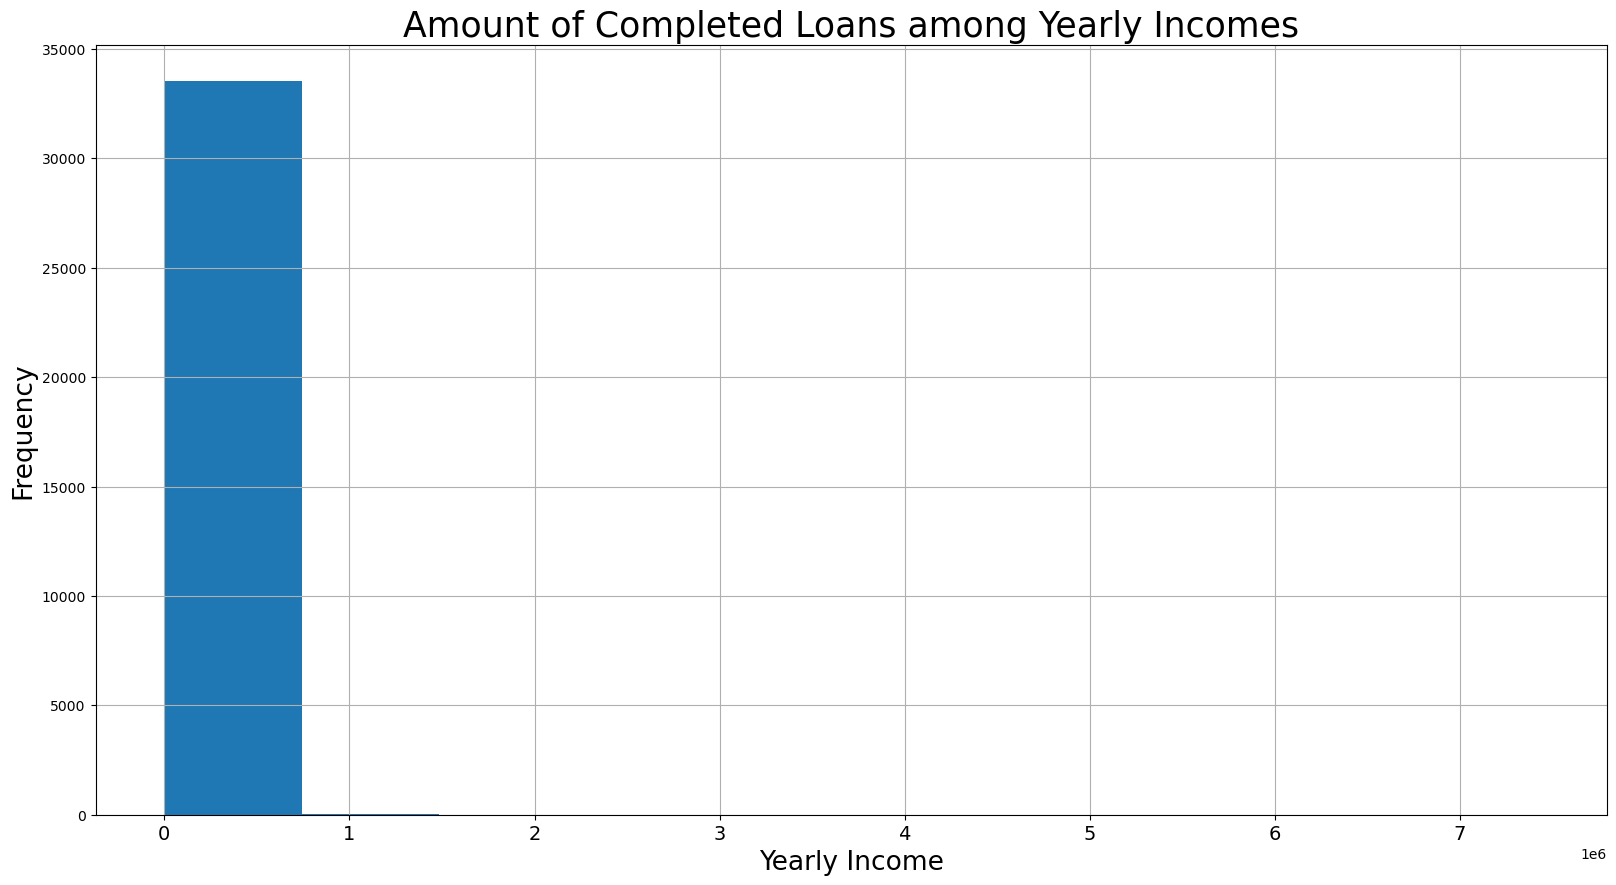

In [15]:
# Code for cleaning data
# drops "CreditGrade" column
df_prosper_loan_data.drop(columns=["CreditGrade"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with at least 1 null value in "LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable" columns
df_prosper_loan_data.dropna(subset=["LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with false values under "IncomeVerifiable" column
df_prosper_loan_data.drop(df_prosper_loan_data[df_prosper_loan_data["IncomeVerifiable"] == 'False'].index, inplace=True) # put condition directly into code for dropping rows with false values because "IncomeVerifiable" column is a BOOLEAN Column (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

# multiples "StatedMonthlyIncome" column by 12 & puts results in new column called "YearlyIncome"
df_prosper_loan_data["YearlyIncome"] = df_prosper_loan_data["StatedMonthlyIncome"].mul(12)

# condition that checks if only Completed loans have Closed Dates
close_date_for_loan_completion_condition = df_prosper_loan_data[(df_prosper_loan_data["ClosedDate"].notna()) & (df_prosper_loan_data["LoanStatus"] != 'Completed')].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Closed Dates when they are NOT Completed loans
df_prosper_loan_data.drop(close_date_for_loan_completion_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# finds median of "CreditScoreRangeLower" and "CreditScoreRangeUpper" columns & puts results in new column called "CreditScore"
df_prosper_loan_data["CreditScore"] = df_prosper_loan_data[["CreditScoreRangeLower", "CreditScoreRangeUpper"]].median(axis=1)

# -------------------- REMOVE THIS LINE LATER

# Code for creating new dataframe with Completed Loans ONLY for histogram
# creates dataframe with completed loans
df_prosper_complete_loans_data = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Completed']

# creates dataframe with "LoanStatus" & "YearlyIncome" columns of completed loans ONLY
df_prosper_complete_loans_and_yearly_incomes_data = df_prosper_complete_loans_data[["LoanStatus", "YearlyIncome"]]

# -------------------- REMOVE THIS LINE LATER

# Code for creating histogram
# creates & displays histogram for "df_prosper_loan_data"
df_prosper_complete_loans_and_yearly_incomes_data.hist(xlabelsize=14, figsize=(19.5,10))

# adds x-axis label to histogram
plt.xlabel('Yearly Income', fontsize=19)

# adds y-axis label to histogram
plt.ylabel('Frequency', fontsize=19)

# adds title to histogram
plt.title('Amount of Completed Loans among Yearly Incomes', fontsize=25)

Text(0.5, 1.0, 'Amount of Completed Loans among Lowest Yearly Incomes')

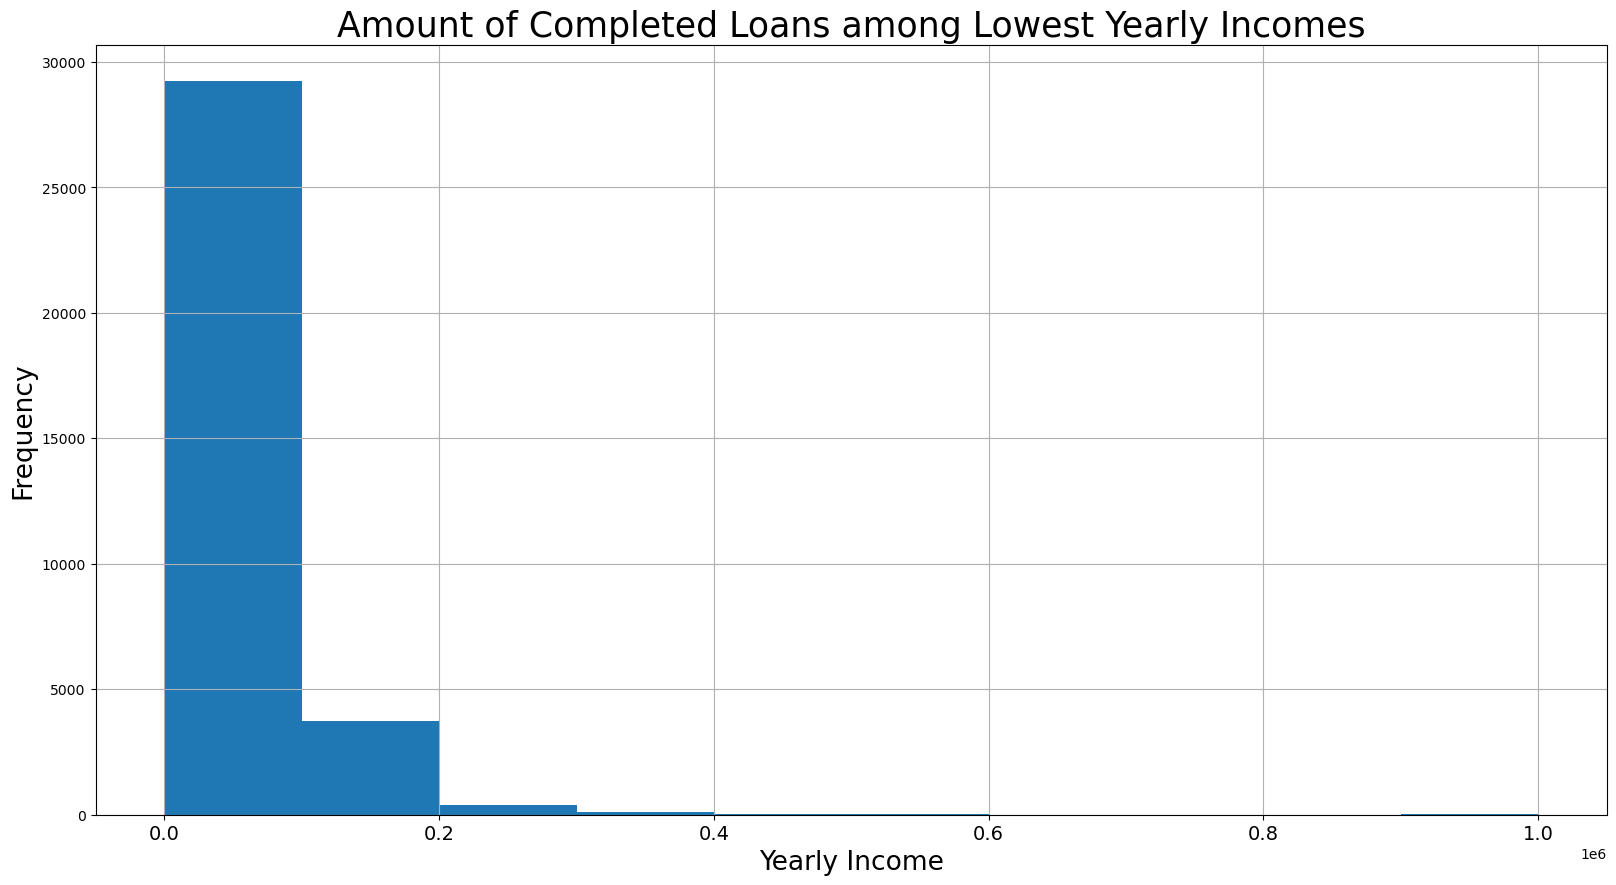

In [16]:
# filters out yearly incomes less than or equal to 1000000
lowest_yearly_incomes_data = df_prosper_complete_loans_data[df_prosper_complete_loans_data["YearlyIncome"] <= 1000000]

# creates dataframe with "LoanStatus" & "YearlyIncome" columns of completed loans ONLY
df_prosper_complete_loans_and_lowest_yearly_incomes_data = lowest_yearly_incomes_data[["LoanStatus", "YearlyIncome"]]

# Code for investigating dataset
# creates & displays histogram for "df_prosper_loan_data"
df_prosper_complete_loans_and_lowest_yearly_incomes_data.hist(xlabelsize=14, figsize=(19.5,10))

# adds x-axis label to histogram
plt.xlabel('Yearly Income', fontsize=19)

# adds y-axis label to histogram
plt.ylabel('Frequency', fontsize=19)

# adds title to histogram
plt.title('Amount of Completed Loans among Lowest Yearly Incomes', fontsize=25)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

In **both histograms**, the people with the lowest yearly incomes had the most completed loans while the rest of the yearly incomes do not have a lot.

The **first histogram** shows the amount of completed loans over the whole range of yearly incomes. There was an unusually large amount of completed loans between _0 and 1000000_ dollars while the rest of the yearly incomes do not have a lot of completed loans.

One transformation that was made was that the **"CreditGrade"** column was dropped. If all the null values in the **"CreditGrade"** column were dropped, all the loans left will have closed dates whether the loans are complete or incomplete. If a loan is incomplete, then it should not have a closed date to match the information that the loan is still open. If loans that were _incomplete_ and still have a _closed date_, the information about those loans would be false. Therefore, the rows of those loans would have to be dropped. However, if all those rows with both _incomplete loans_ and _closed dates_ were dropped, the dataset would only have data of _completed loans_. This would prevent questions about loans that are still open from being answered. Therefore, the **"CreditGrade"**, column was dropped.

Another transformation that was performed was that rows with null values in the **"LoanStatus"**, **"StatedMonthlyIncome"**,**"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"** columns were dropped. The rows with null values in the **"LoanStatus"**, **"StatedMonthlyIncome"**, **"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"** columns were dropped because those rows could not be analyzed. This was also done to decrease the amount of data to analyze. If all the rows with at least one null value, except for rows with null values under the **"ClosedDate"** column, were deleted, there would be no data left because all the rows have at least one null value that is not under the **"ClosedDate"** column. Therefore, only rows with null values in the **"LoanStatus"**, **"StatedMonthlyIncome"**,**"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"** columns were dropped.

Another transformation that was performed was that rows with false values under **"IncomeVerifiable"** column were dropped. Since the **False** values in the **"IncomeVerifiable"** column confirm that the corresponding values in the **"StatedMonthlyIncome"** column are _false_, there is no need to analyze the row. Therefore, the rows were dropped. This was also done to decrease the amount of data to analyze.

Another transformation that was performed was that the **"StatedMonthlyIncome"** column was multiplied by twelve to find the yearly incomes. Those incomes were then put into a new column called **"YearlyIncome"**. This was done to find the real yearly income because the dataset did not have a column that holds the specific yearly incomes. 

Another transformation that was performed was that the loans that were both _incomplete_ and had _closed dates_ were dropped. Loans that are incomplete should not have a close date because they are still open. Thus, if a loan was incomplete and still had a closed date, the information of the loan would be false. Therefore, those rows with conflicting information would have to be dropped. 

Another transformation that was performed was that the completed loans were filtered out in the dataset and put into a new dataframe called **df_prosper_complete_loans_data** to prevent the cleaned data from being damaged. Since one question only involves complete loans, the dataframe of complete loans was created separately because the other questions involve different data other than the data of completed loans.

Another transformation that was performed was that the median of the values in the **"CreditScoreRangeLower"** and **"CreditScoreRangeUpper"** columns were found. Those medians were then put into a new column called **"CreditScore"**. This was done to estimate the real credit scores because the dataset did not have a column that holds the specific credit scores. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

Since the **first histogram** showed that there was an unusually large amount of completed loans between _0 and 1000000_ dollars while the rest of the yearly incomes looked like they had _nearly or exactly zero_ completed loans, the **second histogram** was created to display a closer visual of the amount of completed loans over the yearly incomes between _0 and 1000000_ dollars where there was an unusually large amount of completed loans in the **first histogram**. There was an unusually large amount of completed loans between _0 and 100000_ dollars. The **second histogram** displayed a better histogram of the data of the completed loans for the yearly incomes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

In [235]:
# Code for creating new dataframe with Completed Loans ONLY for scatterplot
# creates dataframe with completed loans
df_prosper_complete_loans_data = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Completed']

# creates dataframe with "LoanStatus" & "YearlyIncome" columns of completed loans ONLY
df_prosper_complete_loans_and_yearly_incomes_data = df_prosper_complete_loans_data[["LoanStatus", "YearlyIncome"]]


# Code for investigating dataset
# creates & displays histogram for "df_prosper_loan_data"
#df_prosper_complete_loans_and_yearly_incomes_data.scatter(xlabelsize=14, figsize=(19.5,10))

df_prosper_loan_data.plot(x='city', y='Pollution Level (Air Quality Index values)', kind='scatter', title='Most Polluted Cities during 2019', rot=45, fontsize=13) # creates & displays first graph for "merged_df_highest_city_population_and_pollution_2019" ("rot=45" ensures x-axis labels are slanted, so ALL Labels can be read)

# adds x-axis label to histogram
plt.xlabel('Yearly Income', fontsize=19)

# adds y-axis label to histogram
plt.ylabel('Frequency', fontsize=19)

# adds title to histogram
plt.title('Amount of Completed Loans among Yearly Incomes', fontsize=25)

AttributeError: 'DataFrame' object has no attribute 'scatter'

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Tip**: Create a list of summary findings to make it easy to review.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

